# Group 10 - Project 1

# Members: Bryan Groves, Randy Lam, Zach Wood, Marti Reisinger

# Topic: Drivers in revenue for top 1000 movies

## Overview: We intend to utilize a dataset from Kaggle that outlines the top 1000 movies by their ranking. We intend to analyze the studio, runtime, and performance by date  from both revenue and number of movies that fall within these categories.

In [1]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#Load CSV
movie_df = pd.read_csv("Resources/movies.csv")

movie_df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [3]:
cleaned_columns = movie_df.drop(columns = ["Movie Info","Unnamed: 0","Genre"])

cleaned_columns.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,2 hr 18 min,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,3 hr 1 min,PG-13
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,2 hr 42 min,PG-13
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,2 hr 14 min,NaN
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,2 hr 29 min,NaN


In [4]:
final_movie_list = cleaned_columns.dropna()

final_movie_list

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,2 hr 18 min,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,3 hr 1 min,PG-13
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,2 hr 42 min,PG-13
6,Titanic (1997),Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,3 hr 14 min,PG-13
7,Jurassic World (2015),Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,2 hr 4 min,PG-13
...,...,...,...,...,...,...,...,...
911,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,1 hr 43 min,PG
913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,2 hr 3 min,PG-13
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,2 hr 13 min,PG-13
916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,1 hr 38 min,R


# Analysis

#### We would like to see how much revenue each studio is generating in total by creating stacked bar chart with revenue by studio

In [5]:
rev_totals = final_movie_list.drop(columns = ["Movie Runtime","Title","License","Release Date"])

rev_totals.head()

,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $)
0,Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700
1,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328
2,Twentieth Century Fox,760507625,2086738578,2847246203
6,Paramount Pictures,659363944,1542283320,2201647264
7,Universal Pictures,652385625,1018130819,1670516444


#### Per studio, what is their average revenue for movies that fall within the top 1000 list

In [6]:
counts = rev_totals.groupby('Distributor').count()

counts

,Domestic Sales (in $),International Sales (in $),World Sales (in $)
Distributor,,,
Artisan Entertainment,1,1,1
Columbia Pictures,3,3,3
Dimension Films,7,7,7
DreamWorks,19,19,19
DreamWorks Distribution,15,15,15
FilmDistrict,2,2,2
Focus Features,2,2,2
Fox Searchlight Pictures,3,3,3
IFC Films,1,1,1


In [9]:
rev_totals.dtypes


Distributor                   object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
dtype: object

In [11]:
average_revenue = rev_totals / rev_totals.groupby('Distributor').count()

average_revenue

,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $)
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
...,...,...,...,...
United Artists,NaN,NaN,NaN,NaN
United Artists Releasing,NaN,NaN,NaN,NaN
Universal Pictures,NaN,NaN,NaN,NaN
Walt Disney Studios Motion Pictures,NaN,NaN,NaN,NaN


#### Is there a better time of year for movie successes? We would like to look at the top 1000 movies and understand if summer blockbusters (June-Aug) fair better than holiday movies (Nov-Jan)

In [ ]:
#Randy Visual 1 

#### We would like to measure the total revenue by year for movies that are in the top 1000 list

In [ ]:
#Randy Visual 2

#### Create chart based on revenue by market

In [ ]:
#Marti Visual 1

#### Provide analysis of total counts and revenue by rating

In [ ]:
#Marti Visual 2

# Hypothesis Test

#### Research Hypothesis: In our sample of top U.S. films, we believe that films with shorter runtime will earn more on average than those with a longer runtime.

#### Null Hypothesis: There is no difference in earnings in films based on runtime.

In [6]:
#Zach Hypothesis

In [10]:
hypoth_df = final_movie_list

In [ ]:
hypoth_df["Movie Runtime"] = hypoth_df["Movie Runtime"].str.replace(" hr", "*60").str.replace(" ", " + ").str.replace("min", "0").apply(eval)

In [12]:
hypoth_df

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,138,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,181,PG-13
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,162,PG-13
6,Titanic (1997),Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,194,PG-13
7,Jurassic World (2015),Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,124,PG-13
...,...,...,...,...,...,...,...,...
911,While You Were Sleeping (1995),Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,103,PG
913,The Notebook (2004),New Line Cinema,"June 25, 2004",81001787,36813370,117815157,123,PG-13
915,Eat Pray Love (2010),Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,133,PG-13
916,The Texas Chainsaw Massacre (2003),New Line Cinema,"October 17, 2003",80571655,26792250,107363905,98,R


In [13]:
hypoth_rev_list = hypoth_df["World Sales (in $)"].tolist()
hypoth_time_list = hypoth_df["Movie Runtime"].tolist()

In [14]:
print(hypoth_df["Movie Runtime"].median())
print(hypoth_df["Movie Runtime"].mean())
print(hypoth_df["Movie Runtime"].min())
print(hypoth_df["Movie Runtime"].max())

116.0
117.16801075268818
78
201


In [38]:
hypoth_time_series = hypoth_df["Movie Runtime"] 

hypoth_quartiles = hypoth_time_series.quantile([.25, .5, .75])
hypoth_lower = hypoth_quartiles[.25]
hypoth_upper = hypoth_quartiles[.75]
hypoth_iqr = hypoth_upper - hypoth_lower

print(hypoth_lower)
print(hypoth_upper)

101.0
130.0


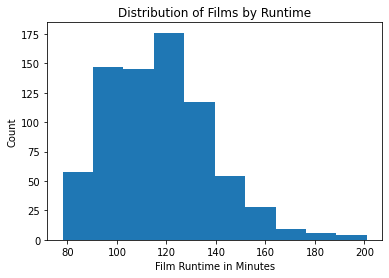

In [27]:
plt.hist(hypoth_time_list)

plt.title("Distribution of Films by Runtime")
plt.xlabel("Film Runtime in Minutes")
plt.ylabel("Count")

plt.show()

In [108]:
hypoth_s_df = hypoth_df.loc[hypoth_df["Movie Runtime"] <= 101]
hypoth_l_df = hypoth_df.loc[hypoth_df["Movie Runtime"] >= 130]

hypoth_m_df = hypoth_df.loc[(hypoth_df["Movie Runtime"] > 101) & (hypoth_df["Movie Runtime"] < 130)]

In [88]:
hypoth_s_series = hypoth_s_df["World Sales (in $)"].squeeze()
hypoth_l_series = hypoth_l_df["World Sales (in $)"].squeeze()

hypoth_s_timelist = hypoth_s_df["Movie Runtime"].to_list()
hypoth_l_timelist = hypoth_l_df["Movie Runtime"].to_list()

In [84]:
print(hypoth_s_series.mean())
print(hypoth_l_series.mean())

334578465.50256413
563375537.8453609


In [106]:
stats.ttest_ind(hypoth_s_series, hypoth_l_series, alternative = "greater")

Ttest_indResult(statistic=-6.740184065168203, pvalue=0.9999999999712019)

In [96]:
hypoth_m_series = hypoth_m_df["World Sales (in $)"].squeeze()

hypoth_m_timelist = hypoth_m_df["Movie Runtime"].to_list()

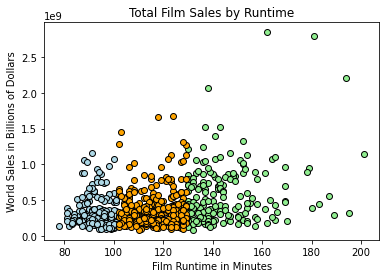

In [111]:
plt.scatter(hypoth_s_timelist, hypoth_s_series, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.scatter(hypoth_l_timelist, hypoth_l_series, marker = "o", facecolors = "lightgreen", edgecolors = "black")
plt.scatter(hypoth_m_timelist, hypoth_m_series, marker = "o", facecolors = "orange", edgecolors = "black")

plt.title("Total Film Sales by Runtime")
plt.xlabel("Film Runtime in Minutes")
plt.ylabel("World Sales in Billions of Dollars")

plt.show()

In [ ]:
final_movie_list["Domestic Sales (in $)"] = final_movie_list['Domestic Sales (in $)'].map("${:,.2f}".format)
final_movie_list["International Sales (in $)"] = final_movie_list['International Sales (in $)'].map("${:,.2f}".format)
final_movie_list["World Sales (in $)"] = final_movie_list['World Sales (in $)'].map("${:,.2f}".format)

final_movie_list